In [5]:
from dataclasses import dataclass
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [6]:
# 根据类别，生成数量，各类别比例生成随机数据
def generate_random_data(names: [str], size: int, p: [str]):
    if len(names) != len(p):
        raise ValueError(f"names length {len(names)} must same as p size {len(p)}")
    return np.random.choice(names, size, p=p)

# 随机数据的基础信息类
@dataclass
class RandomInitParameter:
    column_name: str
    names: [str]
    size: int
    p: [str]

    def get_random_data(self):
        return generate_random_data(self.names, self.size, self.p)

# 绘制df的辅助函数
def draw_column_hist(random_data: pd.DataFrame):
    # 一行画2个
    figure_column_count = 2
    figure_row_count = math.ceil(random_data.shape[1] / figure_column_count)
    fig, axs = plt.subplots(figure_row_count, figure_column_count)
    fig.tight_layout()
    for figure_index, column in enumerate(random_data.columns):
        sns.histplot(data=random_data[column].values, ax=axs[figure_index // 2, figure_index % 2])

    gender class_ranking target
0       女生          班级前半   继续试用
1       女生          班级前半   继续试用
2       女生          班级后半   继续试用
3       女生          班级前半   继续试用
4       女生          班级前半   继续试用
..     ...           ...    ...
995     男生          班级后半   直接离开
996     男生          班级前半   直接离开
997     女生          班级后半   继续试用
998     男生          班级前半   继续试用
999     男生          班级前半   继续试用

[1000 rows x 3 columns]


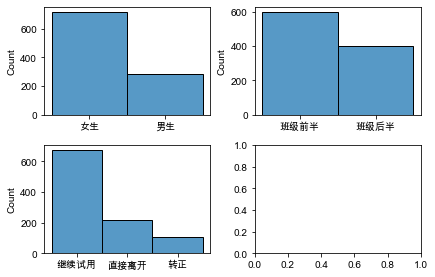

In [7]:
# 数据多少
data_size = 1000
# 各列数据信息
feature_random_meta = [
    RandomInitParameter(
        "gender",
        ["男生", "女生"],
        data_size,
        [0.3, 0.7]
    ),  # 男女生列
    RandomInitParameter(
        "class_ranking",
        ["班级前半", "班级后半"],
        data_size,
        [0.6, 0.4]
    ),  # 班级前后列
]

target_random_meta = [
    RandomInitParameter(
        "target",
        ["直接离开", "继续试用", "转正"],
        data_size,
        [0.2, 0.7, 0.1]
    ),  # 班级前后列
]

# 生成随机数据
random_tmp_data = {}
for meta in feature_random_meta + target_random_meta:
    random_tmp_data.update({
        meta.column_name: meta.get_random_data()
    })

df = pd.DataFrame(random_tmp_data)
print(df)

draw_column_hist(df)

In [18]:
feature_names = [feature_meta.column_name for feature_meta in feature_random_meta]
target_name = target_random_meta[0].column_name
group_df = df.assign(student_count=1).groupby(feature_names+[target_name])["student_count"].count().reset_index()
print(group_df)

conditional_column_group = {}

for feature in feature_names:
    conditional_column_group[feature] = (group_df.groupby([feature, target_name])["student_count"].sum() / group_df.groupby([target_name])["student_count"].sum()).reset_index()
    conditional_column_group[feature] = conditional_column_group[feature].rename(columns={"student_count": f"{feature}|{target_name}"})
    print(conditional_column_group[feature])

   gender class_ranking target  student_count
0      女生          班级前半   直接离开             91
1      女生          班级前半   继续试用            292
2      女生          班级前半     转正             41
3      女生          班级后半   直接离开             56
4      女生          班级后半   继续试用            205
5      女生          班级后半     转正             33
6      男生          班级前半   直接离开             45
7      男生          班级前半   继续试用            113
8      男生          班级前半     转正             17
9      男生          班级后半   直接离开             25
10     男生          班级后半   继续试用             63
11     男生          班级后半     转正             19
  gender target  gender|target
0     女生   直接离开       0.677419
1     女生   继续试用       0.738484
2     女生     转正       0.672727
3     男生   直接离开       0.322581
4     男生   继续试用       0.261516
5     男生     转正       0.327273
  class_ranking target  class_ranking|target
0          班级前半   直接离开              0.626728
1          班级前半   继续试用              0.601783
2          班级前半     转正              0.527273
3    

In [20]:
result = None
for key, value in conditional_column_group.items():
    if result is None :
        result = value
    else:
        result = result.merge(value, on=target_name)
print(result)

   gender target  gender|target class_ranking  class_ranking|target
0      女生   直接离开       0.677419          班级前半              0.626728
1      女生   直接离开       0.677419          班级后半              0.373272
2      男生   直接离开       0.322581          班级前半              0.626728
3      男生   直接离开       0.322581          班级后半              0.373272
4      女生   继续试用       0.738484          班级前半              0.601783
5      女生   继续试用       0.738484          班级后半              0.398217
6      男生   继续试用       0.261516          班级前半              0.601783
7      男生   继续试用       0.261516          班级后半              0.398217
8      女生     转正       0.672727          班级前半              0.527273
9      女生     转正       0.672727          班级后半              0.472727
10     男生     转正       0.327273          班级前半              0.527273
11     男生     转正       0.327273          班级后半              0.472727
